# Avaliação de dados de Filmes - Imdb 2024

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('/content/cleaned_imdb_2024.csv')

In [59]:
df.head()

,Link,Nome do Filme,Gêneros,Visão Geral,Elenco,Linguagem Original,Resumo,Produtora,Data de Lançamento,Tags,Média Votação,Qtde Votos,Orçamento $ (em milhões),Lucro $ (em milhões),Duração (minutos),País de Origem
0,https://www.imdb.com/title/tt5040012/,Nosferatu,"[Fantasy, Horror, Mystery]",A gothic tale of obsession between a haunted y...,"['Lily-Rose Depp', 'Nicholas Hoult', 'Bill Ska...","['English', 'German', 'Romanian', 'Russian']",A gothic tale of obsession between a haunted y...,"['Focus Features', 'Maiden Voyage Pictures', '...",2024-12-25,Succumb to the darkness.,7.3,151000,50.0,176.0,132,United States
1,https://www.imdb.com/title/tt20221436/,Emilia Pérez,"[Comedy, Crime, Drama, Musical, Thriller]",Emilia Pérez follows three remarkable women in...,"['Zoe Saldaña', 'Karla Sofía Gascón', 'Selena ...","['Spanish', 'English']","In modern-day Mexico, overqualified and exploi...","['Why Not Productions', 'Page 114', 'Pathé']",2024-11-13,Not_Found,5.5,71000,27.3,15.0,132,United States
2,https://www.imdb.com/title/tt8999762/,The Brutalist,[Drama],When a visionary architect and his wife flee p...,"['Adrien Brody', 'Felicity Jones', 'Guy Pearce...","['English', 'Hungarian', 'Italian', 'Hebrew', ...",When visionary architect László Toth and his w...,"['Brookstreet Pictures', 'Kaplan Morrison', 'I...",2025-01-24,Welcome to America.,7.9,28000,10.0,31.1,214,Canada
3,https://www.imdb.com/title/tt27657135/,Saturday Night,"[Biography, Comedy, Drama, History]","At 11:30pm on October 11th, 1975, a ferocious ...","['Gabriel LaBelle', 'Rachel Sennott', 'Cory Mi...",['English'],"At 11:30pm on October 11, 1975, a ferocious tr...","['Columbia Pictures', 'TSG Entertainment']",2024-10-11,"October 11, 1975, The First Saturday Night Liv...",7.0,26000,25.0,10.0,109,United States
4,https://www.imdb.com/title/tt17526714/,The Substance,"[Drama, Horror, Sci-Fi]",A fading celebrity takes a black-market drug: ...,"['Demi Moore', 'Margaret Qualley', 'Dennis Qua...",['English'],Have you ever dreamed of a better version of y...,"['Working Title Films', 'A Good Story', 'Black...",2024-09-20,"If you follow the instructions, what could go ...",7.3,249000,17.5,77.0,141,United States


In [41]:
df.dtypes

,0
Home_Page,object
Movie_Name,object
Genres,object
Overview,object
Cast,object
Original_Language,object
Storyline,object
Production_Company,object
Release_Date,object
Tagline,object


In [42]:
# Renomeando colunas
df = df.rename(columns={
    'Home_Page': 'Link',
    'Movie_Name': 'Nome do Filme',
    'Genres': 'Gêneros',
    'Overview': 'Visão Geral',
    'Cast': 'Elenco',
    'Original_Language': 'Linguagem Original',
    'Storyline': 'Resumo',
    'Production_Company': 'Produtora',
    'Release_Date': 'Data de Lançamento',
    'Tagline': 'Tags',
    'Vote_Average': 'Média Votação',
    'Vote_Count': 'Qtde Votos',
    'Budget_USD': 'Orçamento $ (em milhões)',
    'Revenue_$': 'Lucro $ (em milhões)',
    'Run_Time_Minutes': 'Duração (minutos)',
    'Release_Country': 'País de Origem'
})

In [43]:
# Função para converter valores de orçamento
def convert_budget(budget):
    if isinstance(budget, str):
        budget = budget.replace('$', '').replace('M', '')
        try:
            return float(budget)
        except ValueError:
            return np.nan  # Trata casos de conversão inválida
    elif pd.isna(budget):
        return np.nan
    else:
        return float(budget)

# Aplicando a função à coluna 'Budget_USD'
df['Orçamento $ (em milhões)'] = df['Orçamento $ (em milhões)'].apply(convert_budget)

In [44]:
# Função para converter valores de lucro
def convert_profit(profit):
    if isinstance(profit, str):
        profit = profit.replace('$', '').replace('M', '')
        try:
            return float(profit)
        except ValueError:
            return np.nan
    elif pd.isna(profit):
        return np.nan
    else:
        return float(profit)

# Aplicando a função à coluna 'Lucro $ (em milhões)'
df['Lucro $ (em milhões)'] = df['Lucro $ (em milhões)'].apply(convert_profit)

In [45]:
# Convertendo campo 'Release_Date' para data
df['Data de Lançamento'] = pd.to_datetime(df['Data de Lançamento'], errors='coerce')

In [46]:
# Função para converter campo Vote_Count removendo o K
def convert_vote_count(vote_count):
    if isinstance(vote_count, str) and 'K' in vote_count:
        try:
            return int(float(vote_count.replace('K', '')) * 1000)
        except ValueError:
            return np.nan  # lidando com casos onde a conversão falhar
    elif pd.isna(vote_count):
        return np.nan #lidando com nulos
    else:
      try:
        return int(vote_count)
      except ValueError:
        return np.nan

# Aplicando função à coluna
df['Qtde Votos'] = df['Qtde Votos'].apply(convert_vote_count)

In [47]:
# Converter coluna 'Run_Time_Minutes' para inteiro, tratando erros
df['Duração (minutos)'] = pd.to_numeric(df['Duração (minutos)'], errors='coerce').astype('Int64')

In [48]:
df.columns

Index(['Link', 'Nome do Filme', 'Gêneros', 'Visão Geral', 'Elenco',
       'Linguagem Original', 'Resumo', 'Produtora', 'Data de Lançamento',
       'Tags', 'Média Votação', 'Qtde Votos', 'Orçamento $ (em milhões)',
       'Lucro $ (em milhões)', 'Duração (minutos)', 'País de Origem'],
      dtype='object')

# Analise Descritiva - Exploração e resumo dos Dados

### Qual a média, mediana e dispersão da nota dos filmes (Vote_Average)?




In [18]:
media_notas = df['Média Votação'].mean()
mediana_notas = df['Média Votação'].median()
desvio_padrao_notas = df['Média Votação'].std()
print(f"Média das notas: {media_notas:.2f}")
print(f"Mediana das notas: {mediana_notas:.2f}")
print(f"Desvio Padrão das notas: {desvio_padrao_notas:.2f}")

Média das notas: 6.56
Mediana das notas: 6.70
Desvio Padrão das notas: 1.13


### Há filmes com avaliações extremas (muito altas ou muito baixas)?



In [19]:
# Analisando filmes com avaliações extremas
avaliacoes_extremas = df[(df['Média Votação'] >= 9.5) | (df['Média Votação'] <= 2.0)]
print(f"Número de filmes com avaliações extremas: {len(avaliacoes_extremas)}")

Número de filmes com avaliações extremas: 2


In [20]:
# Exibindo alguns exemplos de filmes com avaliações extremas
print("\nExemplos de filmes com avaliações extremas:")
print(avaliacoes_extremas[['Nome do Filme', 'Média Votação']].head(10)) # Exibindo os 10 primeiros


Exemplos de filmes com avaliações extremas:
    Nome do Filme  Média Votação
324  Die, My Love            0.0
362   All for One            1.3


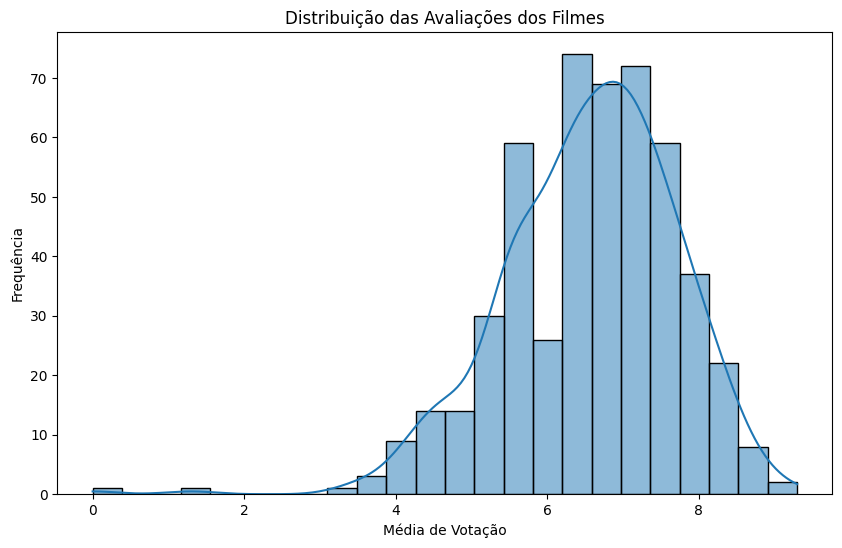

In [21]:
# Plotando um histograma das avaliações para visualizar a distribuição
plt.figure(figsize=(10, 6))
sns.histplot(df['Média Votação'], kde=True)
plt.title('Distribuição das Avaliações dos Filmes')
plt.xlabel('Média de Votação')
plt.ylabel('Frequência')
plt.show()


### Qual a distribuição do número de votos (Vote_Count)?



In [22]:
# Analisando estatísticas descritivas da quantidade de votos
print(df['Qtde Votos'].describe())

count       501.000000
mean      30002.167665
std       54888.875120
min           0.000000
25%        2800.000000
50%       10000.000000
75%       34000.000000
max      599000.000000
Name: Qtde Votos, dtype: float64


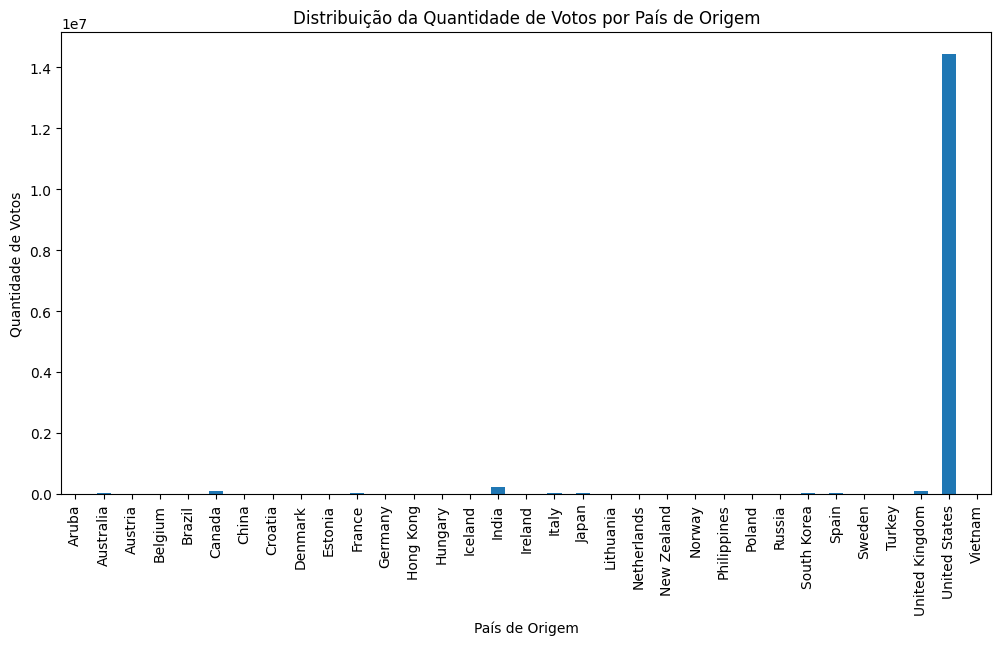

In [23]:
# Distribuição de Qtde Votos por País de Origem
plt.figure(figsize=(12, 6))
df.groupby('País de Origem')['Qtde Votos'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Distribuição da Quantidade de Votos por País de Origem')
plt.xlabel('País de Origem')
plt.ylabel('Quantidade de Votos')
plt.show()


### Qual o orçamento médio (Budget_USD) dos filmes?



In [25]:
orcamento_medio = df['Orçamento $ (em milhões)'].mean()
print(f"Orçamento médio dos filmes: US$ {orcamento_medio:.2f} milhões")

Orçamento médio dos filmes: US$ 15.49 milhões


### Qual a receita média (Revenue_$) dos filmes?


In [24]:
lucro_medio = df['Lucro $ (em milhões)'].mean()
print(f"Lucro médio dos filmes: US$ {lucro_medio:.2f} milhões")

Lucro médio dos filmes: US$ 33.83 milhões


### Qual a rentabilidade média (Receita - Orçamento)?


In [26]:
rentabilidade_media = df['Lucro $ (em milhões)'].mean() - df['Orçamento $ (em milhões)'].mean()
print(f"Rentabilidade média dos filmes: US$ {rentabilidade_media:.2f} milhões")

Rentabilidade média dos filmes: US$ 18.34 milhões


### Qual a distribuição do tempo de duração (Duração - minutos)?



count        427.0
mean     96.456674
std      37.337188
min           13.0
25%           73.0
50%          100.0
75%          116.0
max          412.0
Name: Duração (minutos), dtype: Float64


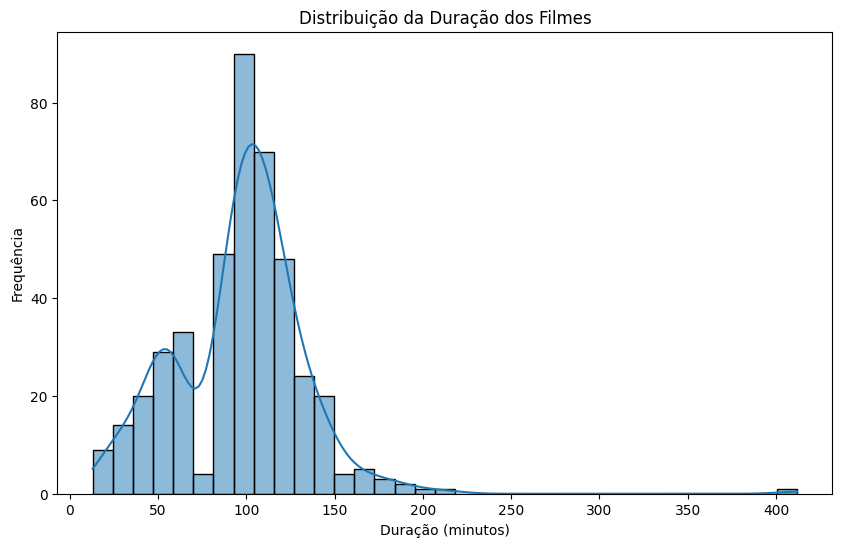

In [27]:
# Analisando estatísticas descritivas da duração dos filmes
print(df['Duração (minutos)'].describe())

# Plotando um histograma da duração dos filmes
plt.figure(figsize=(10, 6))
sns.histplot(df['Duração (minutos)'], kde=True)
plt.title('Distribuição da Duração dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.show()


### Existem padrões por gênero?


In [53]:
import ast
# Convertendo as strings para listas reais
df["Gêneros"] = df["Gêneros"].apply(ast.literal_eval)

# Explodindo os gêneros
df_exploded = df.explode("Gêneros")

# Contando a frequência dos gêneros
frequencia_generos = df_exploded["Gêneros"].value_counts()

print(frequencia_generos)

ValueError: malformed node or string: ['Fantasy', 'Horror', 'Mystery']

In [54]:
# Analisando a relação entre gênero e outras variáveis
# Agrupar por gênero e calcular a média da avaliação
genero_avaliacao = df_exploded.groupby("Gêneros")["Média Votação"].mean().sort_values(ascending=False)

In [55]:
df_exploded.columns

Index(['Link', 'Nome do Filme', 'Gêneros', 'Visão Geral', 'Elenco',
       'Linguagem Original', 'Resumo', 'Produtora', 'Data de Lançamento',
       'Tags', 'Média Votação', 'Qtde Votos', 'Orçamento $ (em milhões)',
       'Lucro $ (em milhões)', 'Duração (minutos)', 'País de Origem'],
      dtype='object')

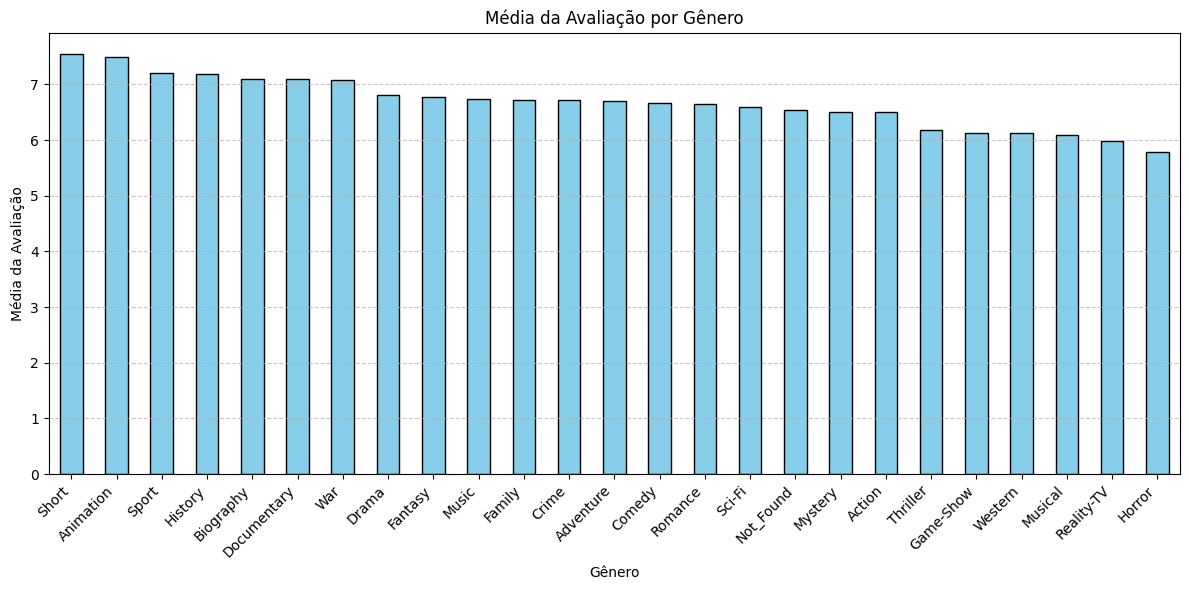

In [56]:
# Plotando gráfico de barras
plt.figure(figsize=(12, 6))
genero_avaliacao.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média da Avaliação por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média da Avaliação')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
# Analisando a relação entre gênero e orçamento
genero_orcamento = df_exploded.groupby("Gêneros")['Orçamento $ (em milhões)'].mean().sort_values(ascending=False)

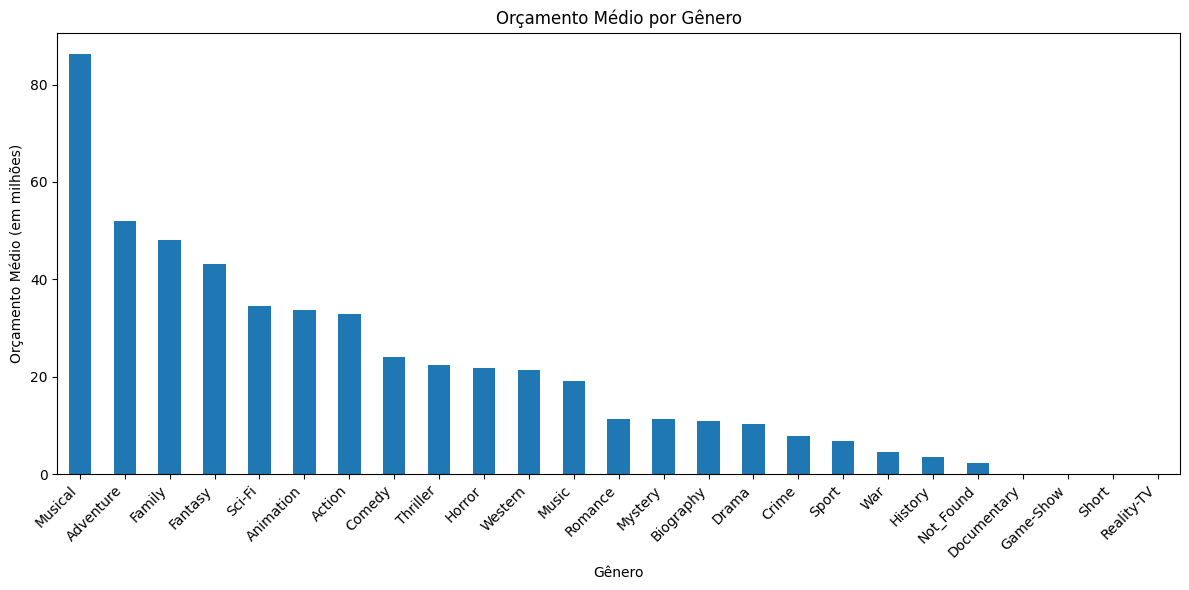

In [33]:
# Plotando gráfico de barras para visualizar
plt.figure(figsize=(12, 6))
genero_orcamento.plot(kind='bar')
plt.title('Orçamento Médio por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Orçamento Médio (em milhões)')
plt.xticks(rotation=45, ha='right') # rotaciona os rótulos do eixo x
plt.tight_layout()
plt.show()

In [34]:
# Analisando a relação entre gênero e lucro
genero_lucro = df_exploded.groupby("Gêneros")['Lucro $ (em milhões)'].mean().sort_values(ascending=False)

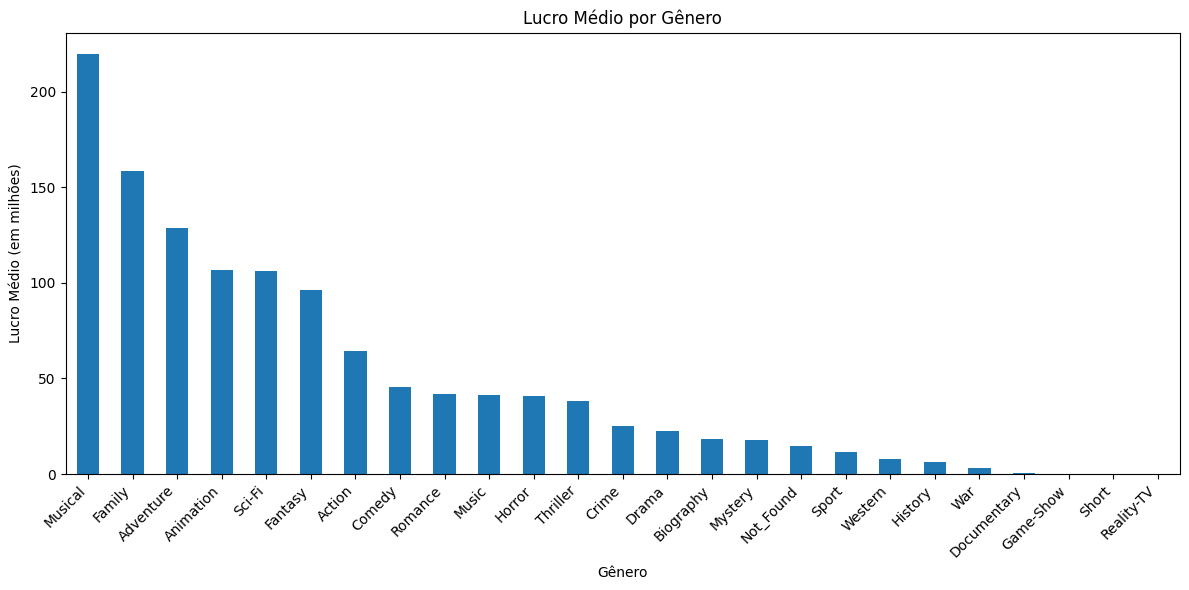

In [35]:
# Plotando gráfico de barras para visualizar
plt.figure(figsize=(12, 6))
genero_lucro.plot(kind='bar')
plt.title('Lucro Médio por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Lucro Médio (em milhões)')
plt.xticks(rotation=45, ha='right') # rotaciona os rótulos do eixo x
plt.tight_layout()
plt.show()

### Quais são os gêneros mais frequentes nos filmes?


In [57]:
# Calculando a frequência dos gêneros
genero_frequencia = df_exploded['Gêneros'].value_counts()

# Exibindo os gêneros mais frequentes
print(genero_frequencia)

Gêneros
Drama          251
Thriller       159
Comedy         116
Action         112
Crime           85
Adventure       69
Horror          69
Mystery         63
Sci-Fi          60
Not_Found       59
Fantasy         56
Romance         49
History         36
Animation       34
Biography       28
Family          26
War             13
Music           11
Musical         10
Sport           10
Documentary      9
Western          5
Reality-TV       5
Game-Show        3
Short            2
Name: count, dtype: int64


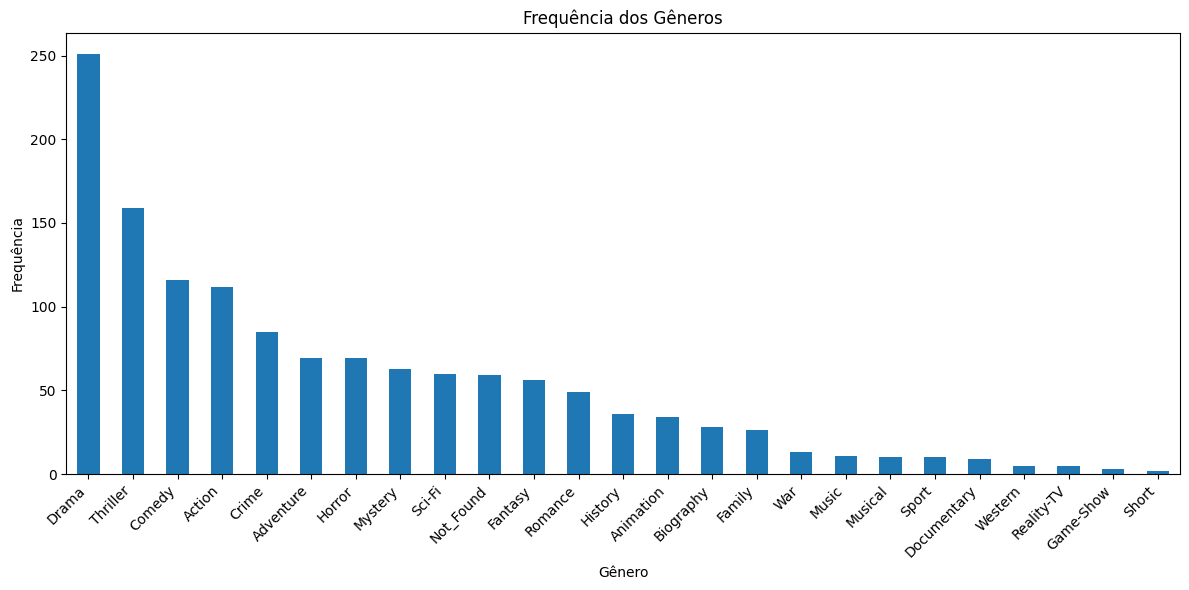

In [58]:
# Plotando um gráfico de barras para visualizar a frequência dos gêneros
plt.figure(figsize=(12, 6))
genero_frequencia.plot(kind='bar')
plt.title('Frequência dos Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Filmes de múltiplos gêneros são comuns?


In [63]:
# Contar o número de gêneros por filme (lidando com valores NaN)
multiple_genres = df["Gêneros"].dropna().apply(len)

# Contar a frequência normalizada (%) de filmes por número de gêneros
multiple_genres_counts = multiple_genres.value_counts(normalize=True) * 100

print(multiple_genres_counts)

Gêneros
1    26.546906
3    24.950100
2    23.353293
4    13.173653
5     6.986028
6     3.792415
8     0.598802
7     0.598802
Name: proportion, dtype: float64


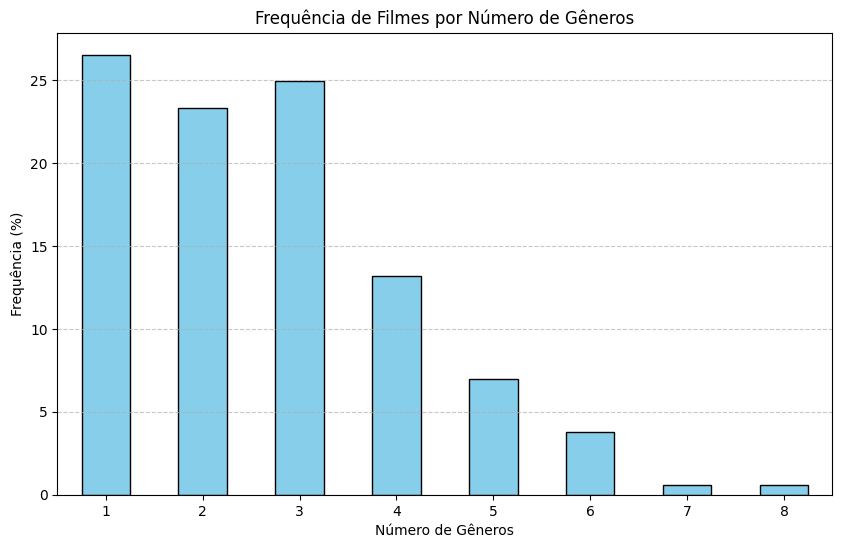

In [64]:
# Plotar um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(10, 6))
multiple_genres_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequência de Filmes por Número de Gêneros')
plt.xlabel('Número de Gêneros')
plt.ylabel('Frequência (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Quais são os idiomas originais mais frequentes?


In [65]:
import ast
# Convertendo as strings para listas reais
df["Linguagem Original"] = df["Linguagem Original"].apply(ast.literal_eval)

# Explodindo os gêneros
df_exploded = df.explode("Linguagem Original")

# Contando a frequência dos gêneros
frequencia_linguagem = df_exploded["Linguagem Original"].value_counts()

print(frequencia_linguagem)

Linguagem Original
English                   412
French                     28
Spanish                    28
Japanese                   20
German                     16
Italian                    14
Korean                     13
Not_Found                  11
Hindi                       8
Malayalam                   7
Russian                     7
Mandarin                    7
Arabic                      5
Swedish                     5
Chinese                     4
Norwegian                   4
Latin                       4
Hebrew                      4
Romanian                    3
Irish Gaelic                3
Tamil                       3
Turkish                     3
Danish                      3
Telugu                      3
Cantonese                   2
Portuguese                  2
None                        2
Thai                        2
Dutch                       2
Greek                       2
American Sign Language      2
Persian                     2
Hungarian            

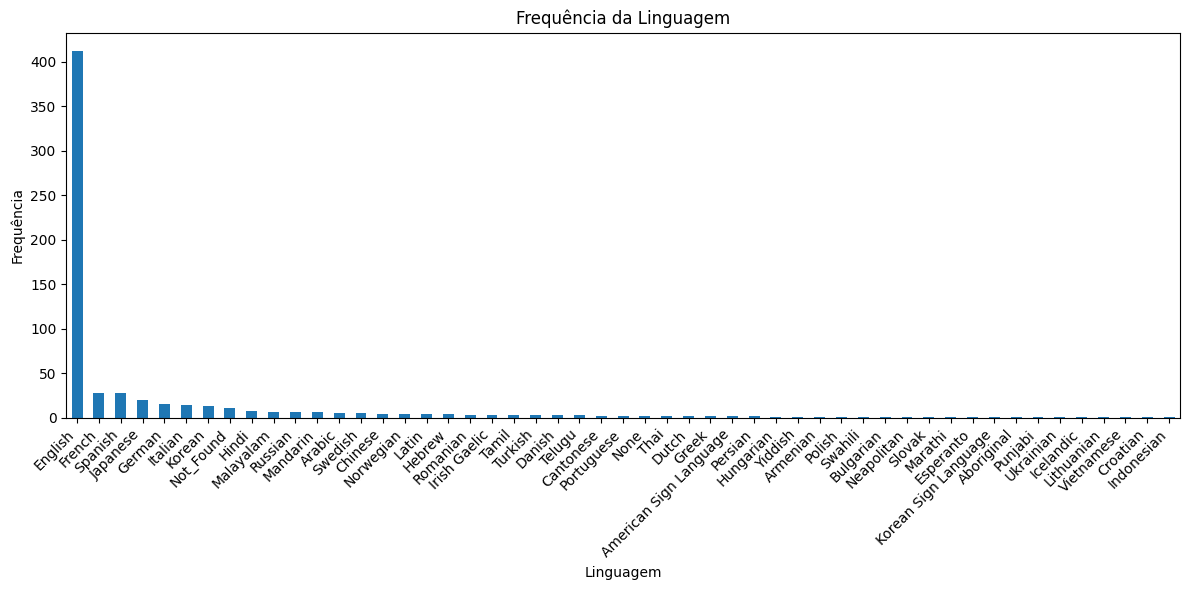

In [66]:
# Plotando um gráfico de barras para visualizar a frequência dos gêneros
plt.figure(figsize=(12, 6))
frequencia_linguagem.plot(kind='bar')
plt.title('Frequência da Linguagem')
plt.xlabel('Linguagem')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Quantos filmes foram lançados por ano/mês?



In [60]:
# Criando colunas de ano e mês a partir da coluna 'Data de Lançamento'
df['Ano de Lançamento'] = df['Data de Lançamento'].dt.year
df['Mês de Lançamento'] = df['Data de Lançamento'].dt.month

In [61]:
# Agrupando por ano e contando a quantidade de filmes lançados
filmes_por_ano = df.groupby('Ano de Lançamento')['Nome do Filme'].count()

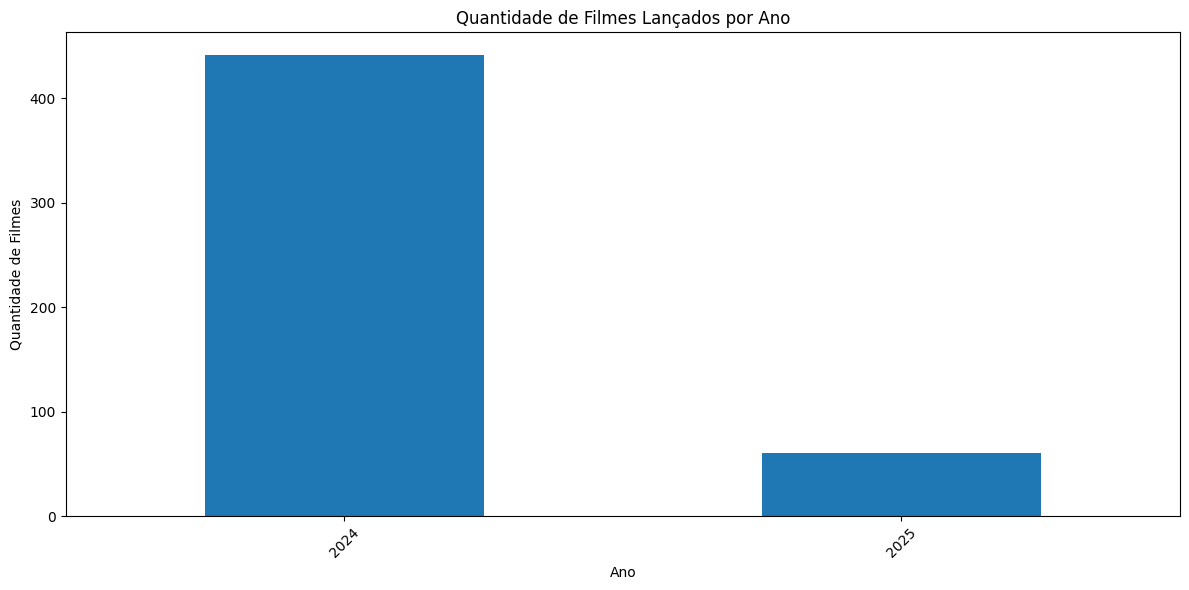

In [62]:
# Plotando o gráfico de filmes lançados por ano
plt.figure(figsize=(12, 6))
filmes_por_ano.plot(kind='bar')
plt.title('Quantidade de Filmes Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
# Agrupando por mês e contando a quantidade de filmes lançados
filmes_por_mes = df.groupby('Mês de Lançamento')['Nome do Filme'].count()



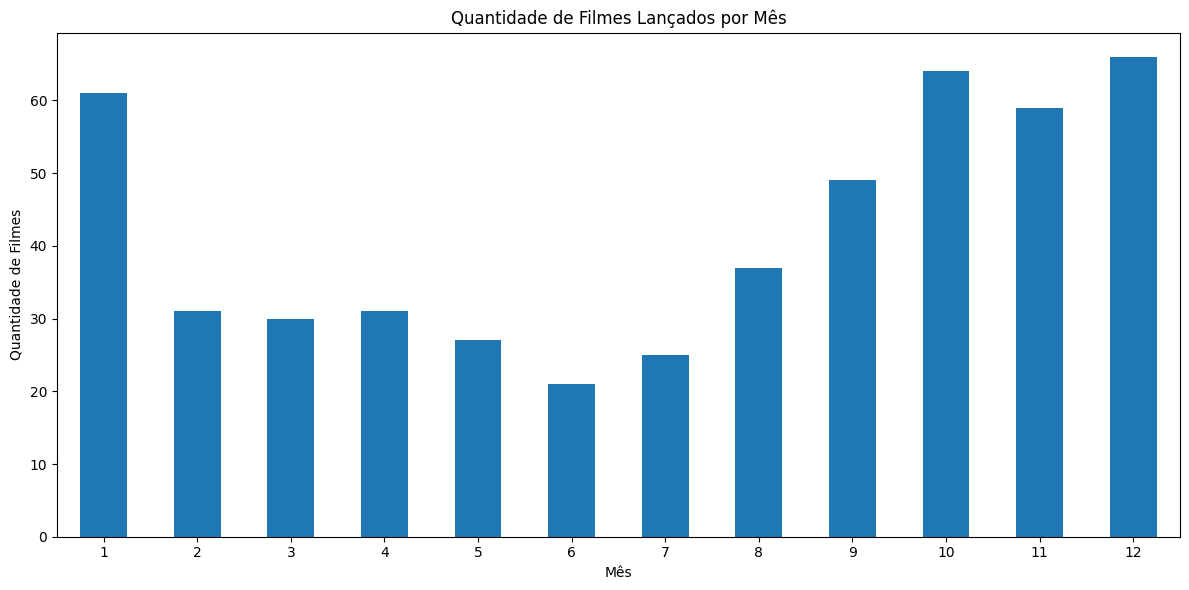

In [64]:
# Plotando o gráfico de filmes lançados por mês
plt.figure(figsize=(12, 6))
filmes_por_mes.plot(kind='bar')
plt.title('Quantidade de Filmes Lançados por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Existe um período do ano com mais lançamentos?

In [67]:
# Agrupando por mês e contando a quantidade de filmes lançados
filmes_por_mes = df.groupby('Mês de Lançamento')['Nome do Filme'].count()

# Encontrando o mês com mais lançamentos
mes_mais_lancamentos = filmes_por_mes.idxmax()
qtde_lancamentos_mes = filmes_por_mes.max()

print(f"O mês com mais lançamentos é o mês {mes_mais_lancamentos} com {qtde_lancamentos_mes} lançamentos.")

O mês com mais lançamentos é o mês 12 com 66 lançamentos.


### Quais são as produtoras que mais aparecem na base?

In [68]:
# Convertendo as strings para listas reais
df["Produtora"] = df["Produtora"].apply(ast.literal_eval)

# Explodindo as produtoras
df_exploded = df.explode("Produtora")

# Contando a frequência das produtoras
frequencia_produtoras = df_exploded["Produtora"].value_counts()
print(frequencia_produtoras)

Produtora
Paramount Pictures         11
Netflix                    11
A24                        10
Columbia Pictures          10
Apple Studios               9
                           ..
A Better Tomorrow Films     1
Atlas Entertainment         1
Entertainment One           1
K Period Media              1
Danmarks Radio (DR)         1
Name: count, Length: 960, dtype: int64


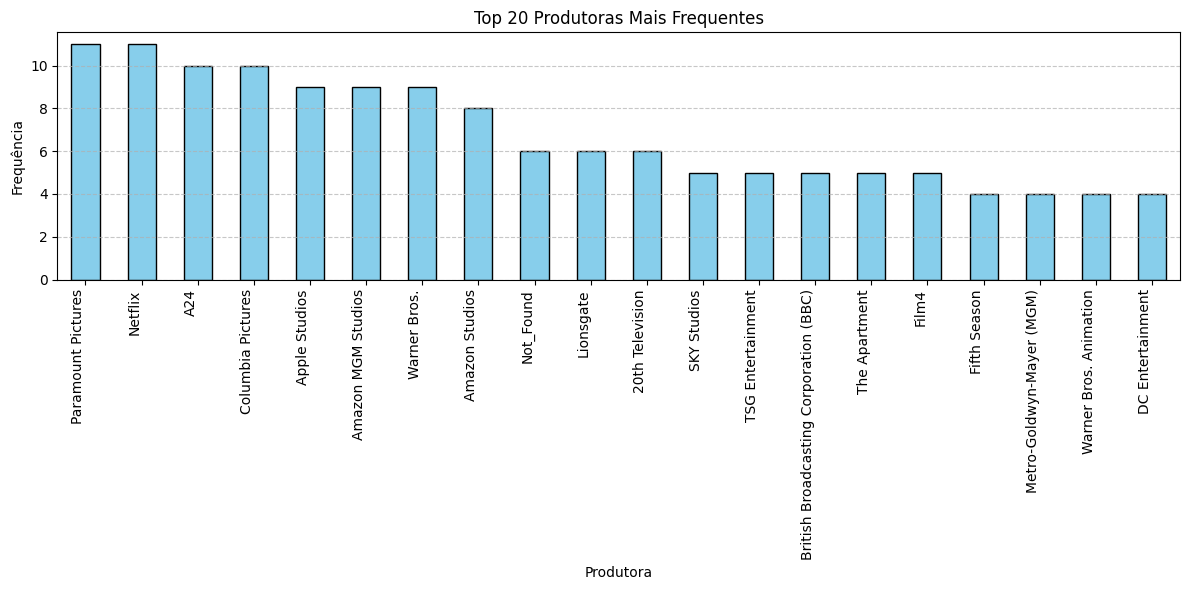

In [71]:
plt.figure(figsize=(12, 6))

# Exibir apenas as 20 produtoras mais frequentes
frequencia_produtoras.head(20).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 20 Produtoras Mais Frequentes')
plt.xlabel('Produtora')
plt.ylabel('Frequência')
plt.xticks(rotation=90, ha='right')  # Rotaciona os rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas guias no eixo Y
plt.tight_layout()

plt.show()

### Quais filmes tiveram maior e menor retorno financeiro?

In [85]:
# Encontrando o filme com maior retorno financeiro
maior_retorno = df['Lucro $ (em milhões)'].max()
filme_maior_retorno = df.loc[df['Lucro $ (em milhões)'] == maior_retorno, 'Nome do Filme'].iloc[0]

print(f"Maior retorno financeiro: {filme_maior_retorno} (US$ {maior_retorno:.2f} milhões)")

Maior retorno financeiro: Despicable Me 4 (US$ 969.10 milhões)


In [86]:
# Encontrando o filme com menor retorno financeiro (considerando apenas valores positivos)
menor_retorno_positivo = df[df['Lucro $ (em milhões)'] > 0]['Lucro $ (em milhões)'].min()
filme_menor_retorno_positivo = df.loc[df['Lucro $ (em milhões)'] == menor_retorno_positivo, 'Nome do Filme'].iloc[0]

print(f"Menor retorno financeiro (positivo): {filme_menor_retorno_positivo} (US$ {menor_retorno_positivo:.2f} milhões)")

Menor retorno financeiro (positivo): Arcadian (US$ 1.20 milhões)


# Exploração Inferencial

### O orçamento impacta a receita?

Existe relação entre Budget_USD e Revenue_$?





In [72]:
# Cálculo da correlação entre orçamento e receita
correlation = df['Orçamento $ (em milhões)'].corr(df['Lucro $ (em milhões)'])
print(f"Correlação entre Orçamento e Receita: {correlation:.2f}")

Correlação entre Orçamento e Receita: 0.47


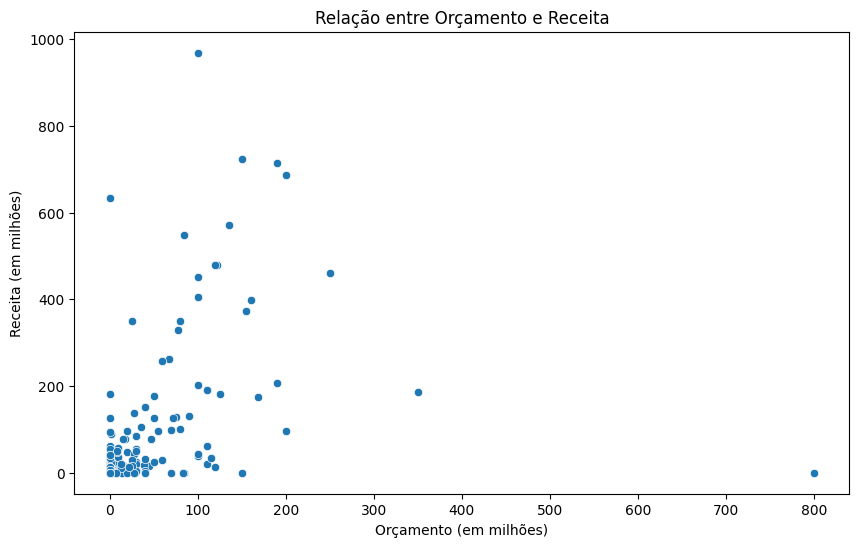

In [73]:
# Criando um scatter plot para visualizar a relação
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Orçamento $ (em milhões)', y='Lucro $ (em milhões)', data=df)
plt.title('Relação entre Orçamento e Receita')
plt.xlabel('Orçamento (em milhões)')
plt.ylabel('Receita (em milhões)')
plt.show()


Qual o retorno médio sobre investimento por gênero?

In [76]:
# Garantir que os gêneros estejam como listas (caso estejam como strings)
import ast
#df["Gêneros"] = df["Gêneros"].apply(ast.literal_eval)  # Converte string para lista (se necessário)

# Calcular o ROI antes de explodir os gêneros
df["ROI"] = df["Lucro $ (em milhões)"] - df["Orçamento $ (em milhões)"]

# Explodir os gêneros para cada filme
df_exploded = df.explode("Gêneros")

# Agrupar por gênero e calcular o ROI médio
roi_por_genero = df_exploded.groupby("Gêneros")["ROI"].mean().sort_values(ascending=False)

# Exibir o ROI médio por gênero
print(roi_por_genero)


Gêneros
Musical        130.812500
Family         118.309091
Animation       80.673333
Adventure       78.565000
Sci-Fi          70.166667
Fantasy         55.786275
Action          28.366316
Romance         28.040000
Comedy          23.545545
Music           17.788889
Crime           16.466234
Horror          16.262069
Thriller        12.478676
Drama           12.088210
Not_Found       12.002000
Biography        6.707692
Mystery          5.894915
Sport            4.288889
History          2.169697
Documentary      0.325000
Game-Show        0.000000
Short            0.000000
Reality-TV       0.000000
War             -2.172727
Western        -13.660000
Name: ROI, dtype: float64


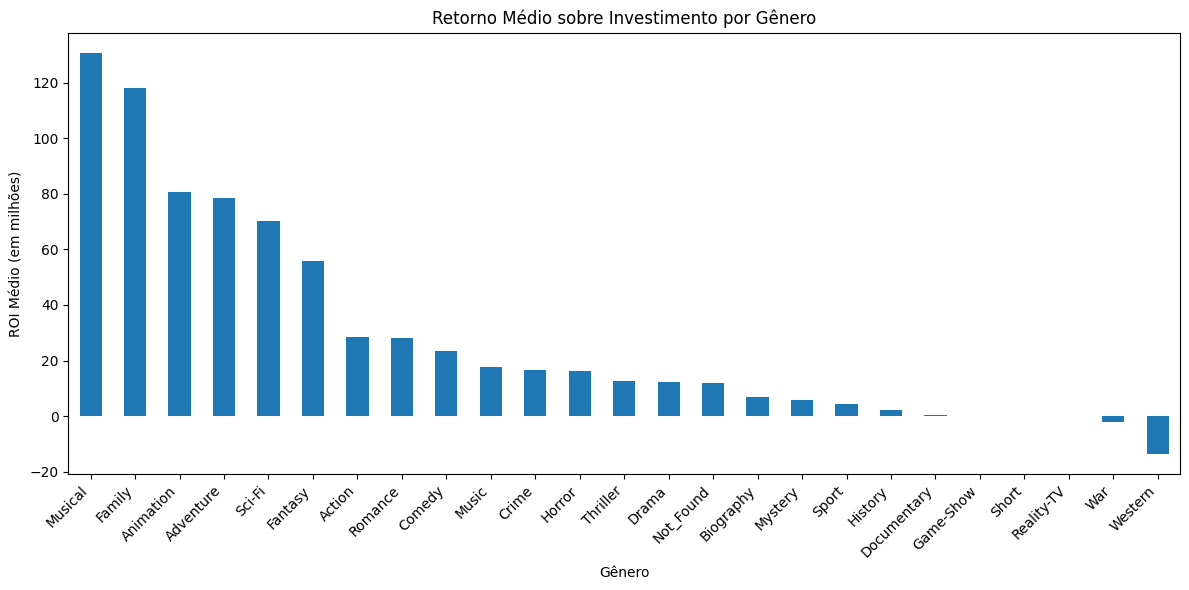

In [77]:
# Plotando um gráfico de barras para visualizar o ROI médio por gênero
plt.figure(figsize=(12, 6))
roi_por_genero.plot(kind='bar')
plt.title('Retorno Médio sobre Investimento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('ROI Médio (em milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### A duração do filme afeta a nota?



In [78]:
# Cálculo da correlação entre duração e média de votação
correlation_duration_rating = df['Duração (minutos)'].corr(df['Média Votação'])
print(f"Correlação entre Duração e Média de Votação: {correlation_duration_rating:.2f}")

Correlação entre Duração e Média de Votação: -0.07


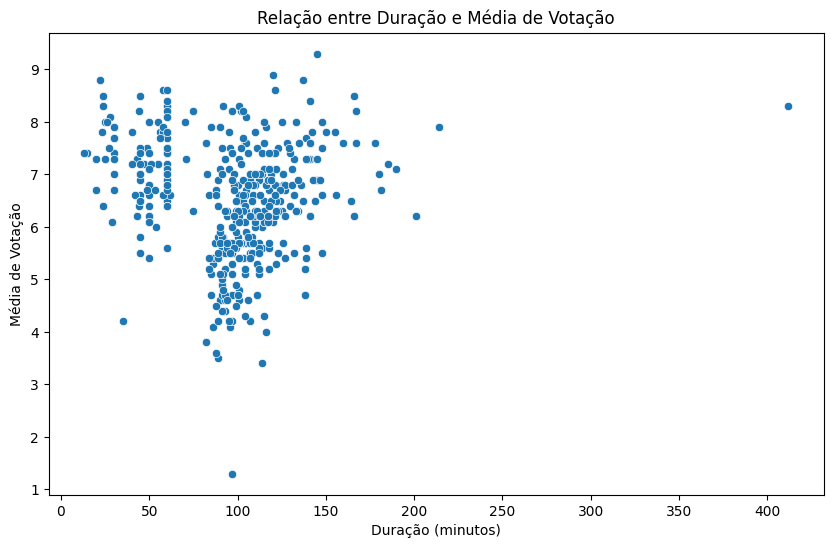

In [79]:
# Criando um scatter plot para visualizar a relação
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duração (minutos)', y='Média Votação', data=df)
plt.title('Relação entre Duração e Média de Votação')
plt.xlabel('Duração (minutos)')
plt.ylabel('Média de Votação')
plt.show()

### Há padrões sazonais nos lançamentos?

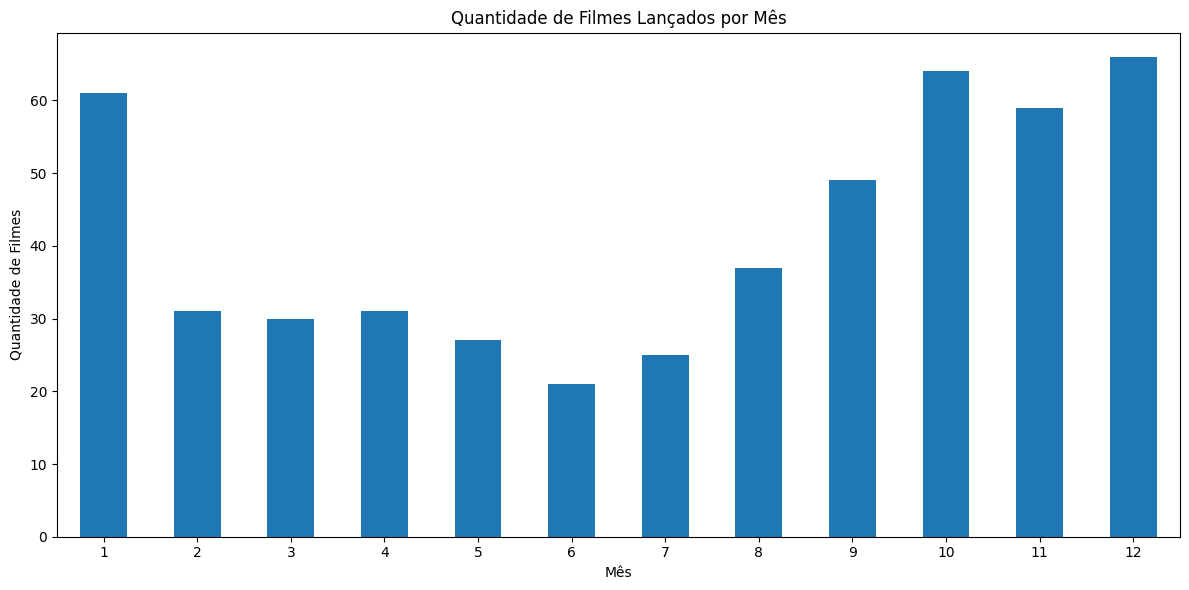

In [83]:
# Agrupando por mês e contando a quantidade de filmes lançados
filmes_por_mes = df.groupby('Mês de Lançamento')['Nome do Filme'].count()

# Plotando o gráfico de filmes lançados por mês
plt.figure(figsize=(12, 6))
filmes_por_mes.plot(kind='bar')
plt.title('Quantidade de Filmes Lançados por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [84]:
# Analisando a tendência de lançamentos ao longo dos meses
filmes_por_mes

,Nome do Filme
Mês de Lançamento,
1,61
2,31
3,30
4,31
5,27
6,21
7,25
8,37
9,49


### Filmes com maior orçamento tendem a ser mais bem avaliados?

In [87]:
# Cálculo da correlação entre orçamento e média de votação
correlation_budget_rating = df['Orçamento $ (em milhões)'].corr(df['Média Votação'])
print(f"Correlação entre Orçamento e Média de Votação: {correlation_budget_rating:.2f}")

Correlação entre Orçamento e Média de Votação: -0.02


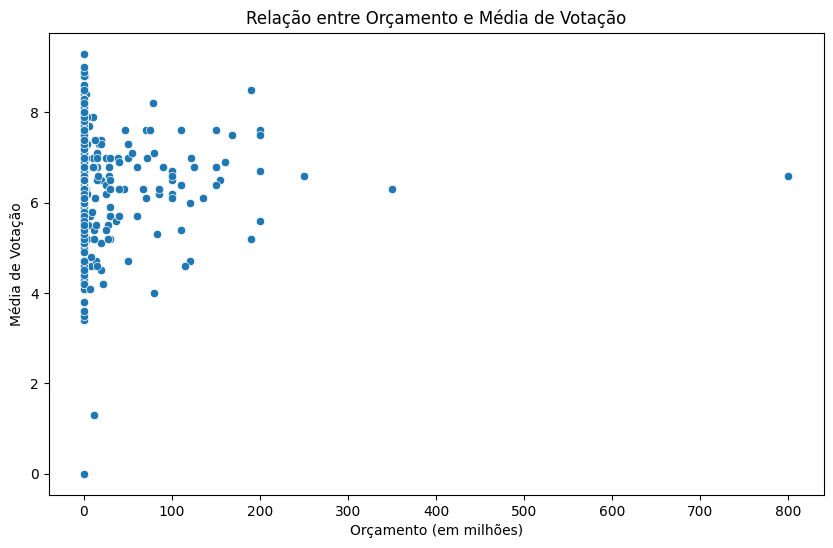

In [88]:
# Criando um scatter plot para visualizar a relação
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Orçamento $ (em milhões)', y='Média Votação', data=df)
plt.title('Relação entre Orçamento e Média de Votação')
plt.xlabel('Orçamento (em milhões)')
plt.ylabel('Média de Votação')
plt.show()
